In [ ]:
import numpy as np

import matplotlib.pyplot as plt 
from time import perf_counter_ns

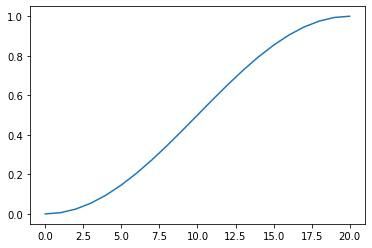

In [ ]:
plt.plot(q)

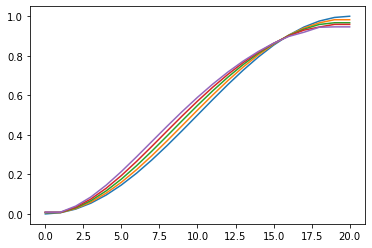

In [ ]:
U = solve_pde(q_ex, dx, dt, T)

plt.plot(U.T)

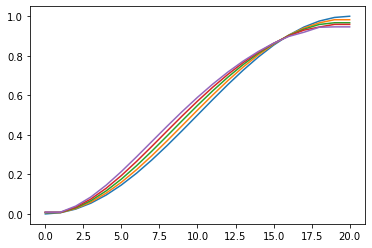

In [ ]:
plt.plot(U.T)
#plt.legend(t)

In [ ]:
dx=0.05
dt=0.0025

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

T = 0.01

x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

n = len(t)

m = len(x)

q = np.zeros(m+1)

for i in range(0, m+1):
    q[i] = func(i*dx)

U = np.zeros((n+1,m+1))

for j in range(0, m+1):
    U[0,j] = q[j]


for i in range(0,n):
    for j in range(1,m):
        U[i+1,j] = U[i,j] + dt * (U[i,j] * (U[i,j+1] - 2 * U[i,j] + U[i,j-1])/(dx ** 2) + (((U[i,j+1] - U[i,j-1])/dx) ** 2) + U[i,j] * (1 - U[i,j]))
    U[i+1,0] = U[i+1,1]
    U[i+1,m] = U[i+1,m-1]
U[n,0] = U[n,1]
U[n,m] = U[n,m-1]

print(U.round(3))

[[0.    0.006 0.024 0.054 0.095 0.146 0.206 0.273 0.345 0.422 0.5   0.578
  0.655 0.727 0.794 0.854 0.905 0.946 0.976 0.994 1.   ]
 [0.007 0.007 0.027 0.06  0.105 0.16  0.224 0.294 0.37  0.447 0.525 0.602
  0.675 0.743 0.805 0.859 0.904 0.94  0.967 0.982 0.982]
 [0.007 0.007 0.03  0.067 0.116 0.176 0.244 0.317 0.394 0.472 0.549 0.623
  0.692 0.755 0.812 0.862 0.903 0.935 0.958 0.967 0.967]
 [0.008 0.008 0.034 0.076 0.13  0.194 0.266 0.342 0.419 0.496 0.57  0.641
  0.706 0.765 0.818 0.863 0.9   0.93  0.945 0.959 0.959]
 [0.009 0.009 0.04  0.086 0.145 0.214 0.289 0.366 0.443 0.518 0.59  0.657
  0.718 0.773 0.822 0.863 0.898 0.919 0.944 0.946 0.946]]


In [ ]:
def solve_pde(q, dx, dt, T): #pde solver for u

    x = np.arange(0, 1, dx)
    t = np.arange(0, T, dt)
    n = len(t)
    m = len(x)
    U = np.zeros((n+1,m+1))
    U[0,:] = q
    for i in range(0,n):
        for j in range(1,m):
            U[i+1,j] = U[i,j] + dt * (U[i,j] * (U[i,j+1] - 2 * U[i,j] + U[i,j-1])/(dx ** 2) + (((U[i,j+1] - U[i,j-1])/dx) ** 2) + U[i,j] * (1 - U[i,j])) #step for finite differences method
        #boundary conditions
        U[i+1,0] = U[i+1,1]
        U[i+1,m] = U[i+1,m-1]
    U[n,0] = U[n,1]
    U[n,m] = U[n,m-1]

    return U

In [ ]:
def solve_cpde(f, U, dt, dx, T): #conjugate pde solver for p --- time-inverted conjugate pde
    x = np.arange(0, 1, dx)
    t = np.arange(0, T, dt)
    n = len(t)
    m = len(x)
    P = np.zeros((n+1,m+1))
    P[0,:] = 2 * (f - U[n, :])
    for i in range(0,n):
        for j in range(1,m):
            P[i+1,j] = P[i,j] + dt * (P[n-i,j] * (P[i,j+1] - 2 * P[i,j] + P[i,j-1])/(dx ** 2) - (2 * U[n-i,j] - 1) * P[i,j])
        P[i+1,0] = P[i+1,1]
        P[i+1,m] = P[i+1,m-1]
    P[n,0] = P[n,1]
    P[n,m] = P[n,m-1]
    return P  


In [ ]:
#initial conditions

dx=0.05
dt=0.0025

x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

T = 0.01

n = len(t)

m = len(x)

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

q_ex = np.zeros(m+1)

for i in range(0, m+1):
    q_ex[i] = func(i*dx)

In [ ]:
#calculating f = u(T,x|q)

U = solve_pde(q_ex, dx, dt, T)

f = np.zeros(m+1)

f = U[n, :]

print(f.round(3))

#solving time-inverted c-pde for P
q = np.zeros(m+1)

U = solve_pde(q, dx, dt, T)
P = solve_cpde(f, U, dt, dx, T)

grad = np.zeros(m+1)

grad = P[n, :]

P.T

[0.009 0.009 0.04  0.086 0.145 0.214 0.289 0.366 0.443 0.518 0.59  0.657
 0.718 0.773 0.822 0.863 0.898 0.919 0.944 0.946 0.946]


array([[0.01812183, 0.01816713, 0.01821255, 0.01937714, 0.02056978],
       [0.01812183, 0.01816713, 0.01821255, 0.01937714, 0.02056978],
       [0.07926037, 0.07945852, 0.07965716, 0.08235878, 0.08512814],
       [0.17165789, 0.17208704, 0.17251725, 0.17760216, 0.18248048],
       [0.29089583, 0.29162307, 0.29235213, 0.29861337, 0.30445508],
       [0.42895631, 0.4300287 , 0.43110377, 0.43709637, 0.44248756],
       [0.57836058, 0.57980649, 0.581256  , 0.58557511, 0.58932936],
       [0.73267094, 0.73450262, 0.73633888, 0.73800398, 0.73929885],
       [0.88674382, 0.88896068, 0.89118308, 0.88968386, 0.88805028],
       [1.03665525, 1.03924688, 1.041845  , 1.03702407, 1.03226624],
       [1.17947487, 1.18242356, 1.18537962, 1.17729147, 1.16941013],
       [1.31301769, 1.31630023, 1.31959098, 1.30840432, 1.29753192],
       [1.43563781, 1.43922691, 1.44282498, 1.42877234, 1.41512278],
       [1.54607924, 1.54994444, 1.5538193 , 1.53717457, 1.52101005],
       [1.64337435, 1.64748278, 1.

In [ ]:
def error(f, U, dx):
    s = 0
    for j in range(m+1):
        s = s + dx * (f[j] - U[n,j]) ** 2
    return s

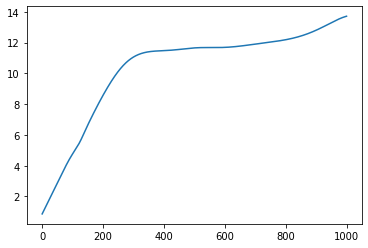

In [ ]:
#initial conditions

dx=0.05
dt=0.0025
h = 0.01
x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

T = 0.01

n = len(t)

m = len(x)

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

q_ex = np.zeros(m+1)

for i in range(0, m+1):
    q_ex[i] = func(i*dx)

#calculating f = u(T,x|q)

U = solve_pde(q_ex, dx, dt, T)

f = np.zeros(m+1)

f = U[n, :]
q = np.zeros(m+1)

n_iter = 1000


r = np.zeros(n_iter)
grad = np.zeros(m+1) 
for j in range(n_iter):
    U = solve_pde(q, dx, dt, T) #calculating U(t,x|q)
    P = solve_cpde(f, U, dt, dx, T)
    grad = - P[n, :] #current grad

    q = q - h * grad

    
    r[j] = -np.log(error(f, U, dx))

plt.plot(r)


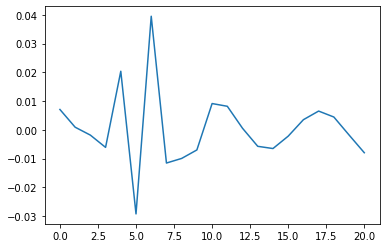

In [ ]:
plt.plot(q-q_ex)

In [ ]:
def solve_pde_m(q, dx, dt, T, e): #pde solver for u with e

    x = np.arange(0, 1, dx)
    t = np.arange(0, T, dt)
    n = len(t)
    m = len(x)
    U = np.zeros((n+1,m+1))
    U[0,:] = q
    U[1,:] = q
    for i in range(1,n):
        for j in range(1,m):
            U[i+1,j] = (2*e*U[i,j] - 2 * e * U[i-1, j] + dt * U[i-1, j] + 2 * dt * dt * (U[i,j] * (U[i,j+1] - 2 * U[i,j] + U[i,j-1])/(dx ** 2) + (((U[i,j+1] - U[i,j-1])/2*dx) ** 2) + U[i,j] * (1 - U[i,j])))/(2*e+dt) #step for finite differences method
        #boundary conditions
        U[i+1,0] = U[i+1,1]
        U[i+1,m] = U[i+1,m-1]
    U[n,0] = U[n,1]
    U[n,m] = U[n,m-1]

    return U

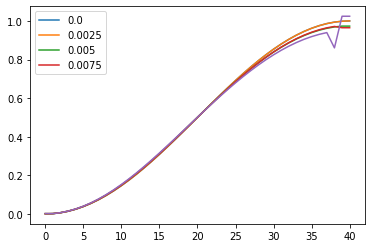

In [ ]:
dx=0.025
dt=0.0025
h = 0.1
x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

T = 0.01

n = len(t)

m = len(x)

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

q_ex = np.zeros(m+1)

for i in range(0, m+1):
    q_ex[i] = func(i*dx)

U = solve_pde_m(q_ex, dx, dt, T, 0.000001)

plt.plot(U.T)

plt.legend(t)

In [ ]:
def solve_cpde_m(f, U, dt, dx, T, e): #conjugate pde solver for p --- time-inverted conjugate pde with eu_tt
    x = np.arange(0, 1, dx)
    t = np.arange(0, T, dt)
    n = len(t)
    m = len(x)
    P = np.zeros((n+1,m+1))
    P[0,:] = 2 * (f - U[n, :])
    P[1,:] = P[0,:]
    for i in range(0,n):
        for j in range(1,m):
            P[i+1,j] = (2*e*P[i,j] - 2 * e * P[i-1, j] + dt * P[i-1, j] + 2 * dt * dt * (P[n-i,j] * (P[i,j+1] - 2 * P[i,j] + P[i,j-1])/(dx ** 2) - (2 * U[n-i,j] - 1) * P[i,j])
        P[i+1,0] = P[i+1,1]
        P[i+1,m] = P[i+1,m-1]
    P[n,0] = P[n,1]
    P[n,m] = P[n,m-1]
    return P  


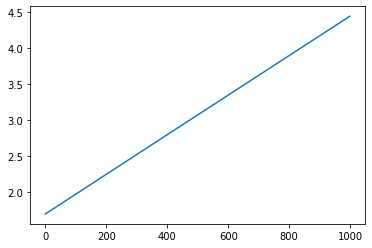

In [ ]:
#initial conditions

dx=0.025
dt=0.00025

h = 0.001
x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

T = 0.001

n = len(t)

m = len(x)

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

q_ex = np.zeros(m+1)

for i in range(0, m+1):
    q_ex[i] = func(i*dx)

#calculating f = u(T,x|q)
U = np.zeros((n+1,m+1))
e = dt / 100
U = solve_pde_m(q_ex, dx, dt, T, e)

f = np.zeros(m+1)

f = U[n, :]
q = np.zeros(m+1)

n_iter = 1000


r = np.zeros(n_iter)
grad = np.zeros(m+1) 

for j in range(n_iter):
    U = solve_pde_m(q, dx, dt, T, e) #calculating U(t,x|q)
    P = solve_cpde_m(f, U, dt, dx, T, e)
    grad =  P[n, :] + e * (P[n,:] - P[n-1,:])/dt #current grad

    q = q + h * grad

    
    r[j] = -np.log(error(f, U, dx))

plt.plot(r)

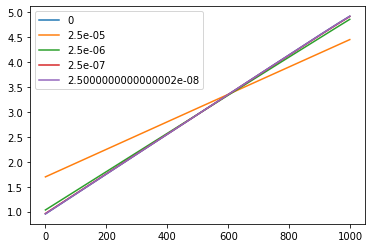

In [ ]:
dx=0.025
dt=0.00025

h = 0.001
x = np.arange(0, 1, dx)

t = np.arange(0, T, dt)

T = 0.001

n = len(t)

m = len(x)

def func(x):
    return (np.sin(np.pi * x / 2)) ** 2

q_ex = np.zeros(m+1)

for i in range(0, m+1):
    q_ex[i] = func(i*dx)

eps = [0, 0.1*dt, 0.01*dt, 0.001 * dt, 0.0001 * dt]

time_taken = np.zeros(len(eps))

for w in range(len(eps)):
    time_before = perf_counter_ns()
    U = np.zeros((n+1,m+1))
    U = solve_pde_m(q_ex, dx, dt, T, eps[w])

    f = np.zeros(m+1)

    f = U[n, :]
    q = np.zeros(m+1)

    n_iter = 1000


    r = np.zeros(n_iter)
    grad = np.zeros(m+1) 

    for j in range(n_iter):
        U = solve_pde_m(q, dx, dt, T, eps[w]) #calculating U(t,x|q)
        P = solve_cpde_m(f, U, dt, dx, T, eps[w])
        grad =  P[n, :] + eps[w] * (P[n,:] - P[n-1,:])/dt #current grad

        q = q + h * grad

    
        r[j] = -np.log(error(f, U, dx))
    time_taken[w] = (perf_counter_ns() - time_before) * 1e-6
    plt.plot(r)

plt.legend(eps)


array([1089.482817, 1100.216896, 1042.909571, 1042.245248, 1028.662161])

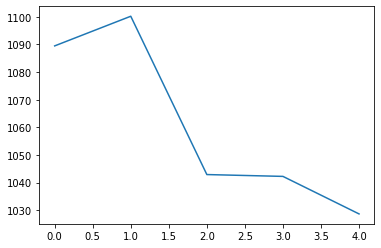

In [ ]:
plt.plot(time_taken)
time_taken